In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display="diagram")

# Step 1: Introduction

Welcome to the dataset inspection!

Let's get started!

# Step 2: Data Preparation

In [35]:
# Load the dataset

loaded_data = pd.read_csv('airfoil_self_noise.csv')
data = loaded_data.drop(columns=['SPL'])
target = loaded_data['SPL']
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include='object').columns

transformer = make_column_transformer(((OneHotEncoder(sparse=False)), categorical_cols),remainder='passthrough')
# transforming
data_array = transformer.fit_transform(data)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data_array, target, test_size=0.2, random_state=42)

# Step 3: Data Exploration

Let's explore the dataset to understand its structure and features.

In [36]:
# Display the number of datapoints (row in a dataframe)
print(data.shape)

# Display the first few rows of the dataset
print(data.head())

# Get basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())

# Display dataset information
print(data.info())


(1503, 5)
      F    A      CL     V         T
0   800  0.0  0.3048  71.3  0.002663
1  1000  0.0  0.3048  71.3  0.002663
2  1250  0.0  0.3048  71.3  0.002663
3  1600  0.0  0.3048  71.3  0.002663
4  2000  0.0  0.3048  71.3  0.002663

Basic statistics of the dataset:
                  F            A           CL            V            T
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000
mean    2886.380572     6.782302     0.136548    50.860745     0.011140
std     3152.573137     5.918128     0.093541    15.572784     0.013150
min      200.000000     0.000000     0.025400    31.700000     0.000401
25%      800.000000     2.000000     0.050800    39.600000     0.002535
50%     1600.000000     5.400000     0.101600    39.600000     0.004957
75%     4000.000000     9.900000     0.228600    71.300000     0.015576
max    20000.000000    22.200000     0.304800    71.300000     0.058411
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns

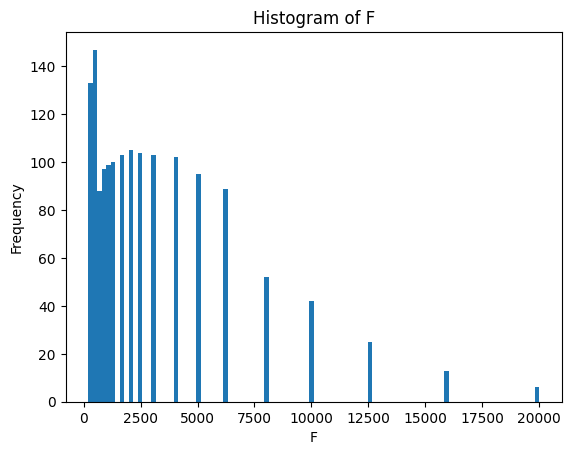

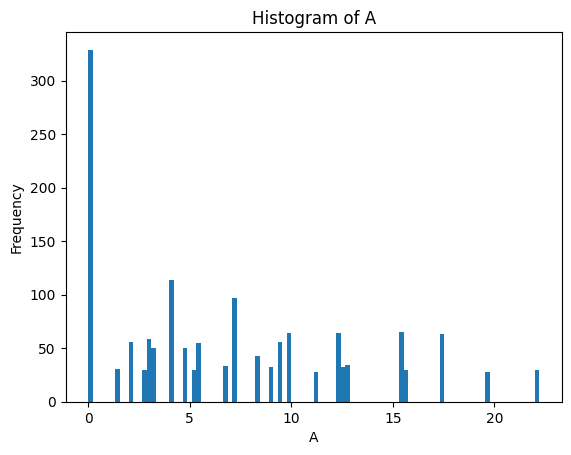

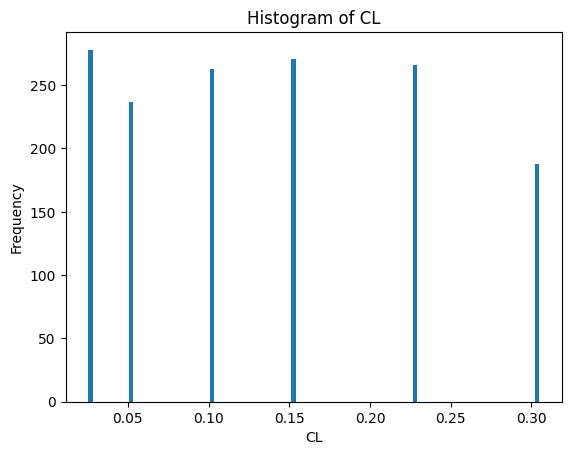

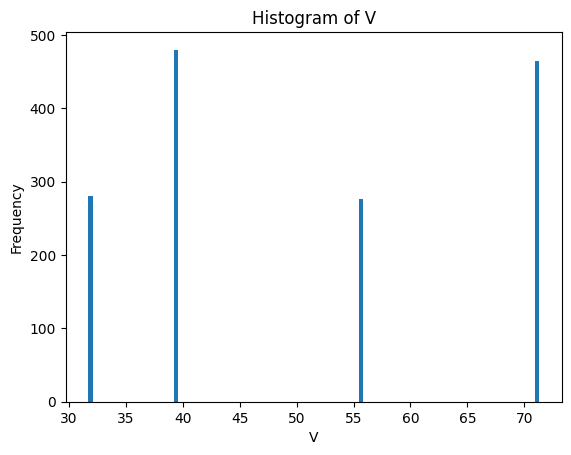

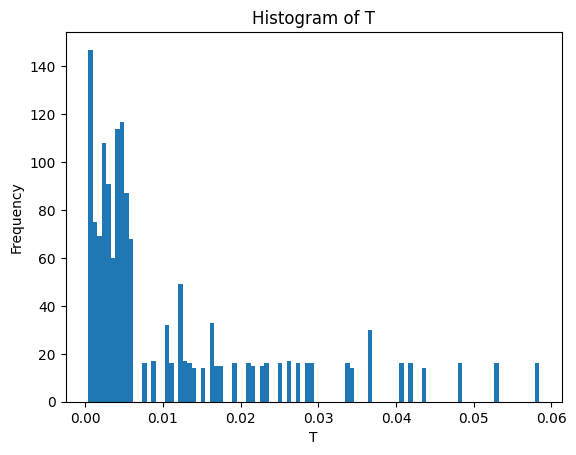

In [37]:
# Create a histogram for numeric columns only
for col in numeric_cols:
    data[col].plot.hist(bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [38]:
# Inspect the distribution of the feature

import scipy
feature = None
#feature = data["x1"]
if feature is not None:
    kurtosis = scipy.stats.kurtosis(feature)
    skew = scipy.stats.skew(feature)
    median = np.median(feature)
    print(f"Kurtosis: {kurtosis}")
    print(f"Skew: {skew}")
    print(f"Median: {median}")
    scipy.stats.normaltest(feature)

# Step 4: Data Preprocessing

Now, let's preprocess the data. 

We'll handle missing values (if any), 

encode categorical features (if any),

and scale numeric features.


In [39]:
# Check missing values and handle them (if any)
## FYI: some algorithms do not handle the data having missing values except Tree-based models.

data.isna().sum()
# Scale numeric features using StandardScaler
## FYI: some of the Machine learning algorithm require and benefit from the data to be in a specific range such as Neural networks, SVMs, K-means clustering, PCA, and Logistic regression.
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model creation

We'll now create and train different classification models using scikit-learn.

In [40]:
# Create and train a Logistic Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Create and train a Decision Tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
# Create and train a Random Forest regressor
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [43]:

# Create and train a Support Vector Machine (SVM) regressor
svm = SVR(kernel='linear')
svm.fit(X_train_scaled, y_train)

SVR(kernel='linear')

# Step 6: Model Evaluation

Let's evaluate the models on the testing data using various evaluation metrics.

In [44]:
#Evaluate the Logistic Regression classifier
y_pred_lr = linear_regression.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression:")
print(f"mse: {mse_lr}")

Linear Regression:
mse: 22.12864331824728


In [45]:
# Evaluate the Decision Tree model
y_pred_dt = decision_tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Model:")
print(f"mse: {mse_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")


ValueError: continuous is not supported

In [ ]:
# Evaluate the Random Forest model
y_pred_rf = random_forest.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Model:")
print(f"mse: {mse_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

In [ ]:
# Evaluate the Support Vector Machine (SVM) model
y_pred_svm = svm.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSupport Vector Machine (SVM) Model:")
print(f"mse: {mse_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")